In [1]:
# notebook to illustrate text indexing and relevance scoring

In [2]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

In [3]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [4]:
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/simple_test/txt/", text_filename_pattern="??.txt")
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/recipes/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(directory_of_files="data_sets/mystery_corpus_01/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/iraq_inquiry/txt/", text_filename_pattern="the-report*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/clinton_emails/txt/", text_filename_pattern="C0*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/shakespeare_macbeth/txt/", text_filename_pattern="macbeth_act_0?_scene_0?.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/hillsborough/txt/", text_filename_pattern="H*.txt")

content_directory =  data_sets/recipes/txt/
text_filename_pattern =  ??.txt
self.documents populated =  22


In [5]:
# first clear wordcount and relevance indices
tmt.index_wordcount.delete_index(cr.content_directory)
tmt.index_relevance.delete_index(cr.content_directory)

# for all documents in corpus
for document_name in cr.get_documents():
    print("processing ", document_name)

    # get document text
    document_text = cr.get_text_by_document(document_name)

    # simplify whitespace (remove newlines)
    b = tmt.text_processing.simplify_whitespace(document_text)

    # only keep alphanumeric characters, removes punctuation
    c = tmt.text_processing.keep_only_alphanumeric(b)

    # make lowercase
    d = tmt.text_processing.to_lowercase(c)

    # split into words list
    dl = tmt.text_processing.split_text_into_words(d)
    
    # build n-grams
    #gl = tmt.word_processing.build_ngrams_from_words(dl,2)

    # remove stop words
    el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")
    
    # only keep words with min length 5
    fl = tmt.word_processing.keep_words_min_length(el,5)
    
    # update index
    tmt.index_wordcount.create_wordcount_index_for_document(cr.content_directory, document_name, fl)
    pass


removed wordcount index file:  data_sets/recipes/txt/index_wordcount.hdf5
removed relevance index file:  data_sets/recipes/txt/index_relevance.hdf5
processing  00.txt
processing  01.txt
processing  02.txt
processing  03.txt
processing  04.txt
processing  05.txt
processing  06.txt
processing  07.txt
processing  08.txt
processing  09.txt
processing  10.txt
processing  11.txt
processing  12.txt
processing  13.txt
processing  14.txt
processing  15.txt
processing  16.txt
processing  17.txt
processing  18.txt
processing  19.txt
processing  20.txt
processing  21.txt


In [6]:
# merge document indices into a corpus index
tmt.index_wordcount.merge_wordcount_indices_for_corpus(cr.content_directory)

saving corpus word count index ...  data_sets/recipes/txt/index_wordcount.hdf5


In [7]:
tmt.index_relevance.calculate_relevance_index(cr.content_directory)

saving corpus relevance index ...  data_sets/recipes/txt/index_relevance.hdf5


In [8]:
words_by_relevance = tmt.index_relevance.get_words_by_relevance(cr.content_directory)
# 20 most common
words_by_relevance[:20]

,0
sauce,0.199007
little,0.171704
butter,0.153692
bread,0.144470
flour,0.143196
quantity,0.140520
broth,0.139080
grated,0.129385
water,0.129240
tomato,0.126704


In [9]:
# 20 least common
words_by_relevance[-20:]

,0
quarter,0.007349
portion,0.007349
risotto,0.007349
course,0.006920
strain,0.006920
cities,0.006920
spices,0.006920
flavor,0.006920
catsup,0.006920
canned,0.006920


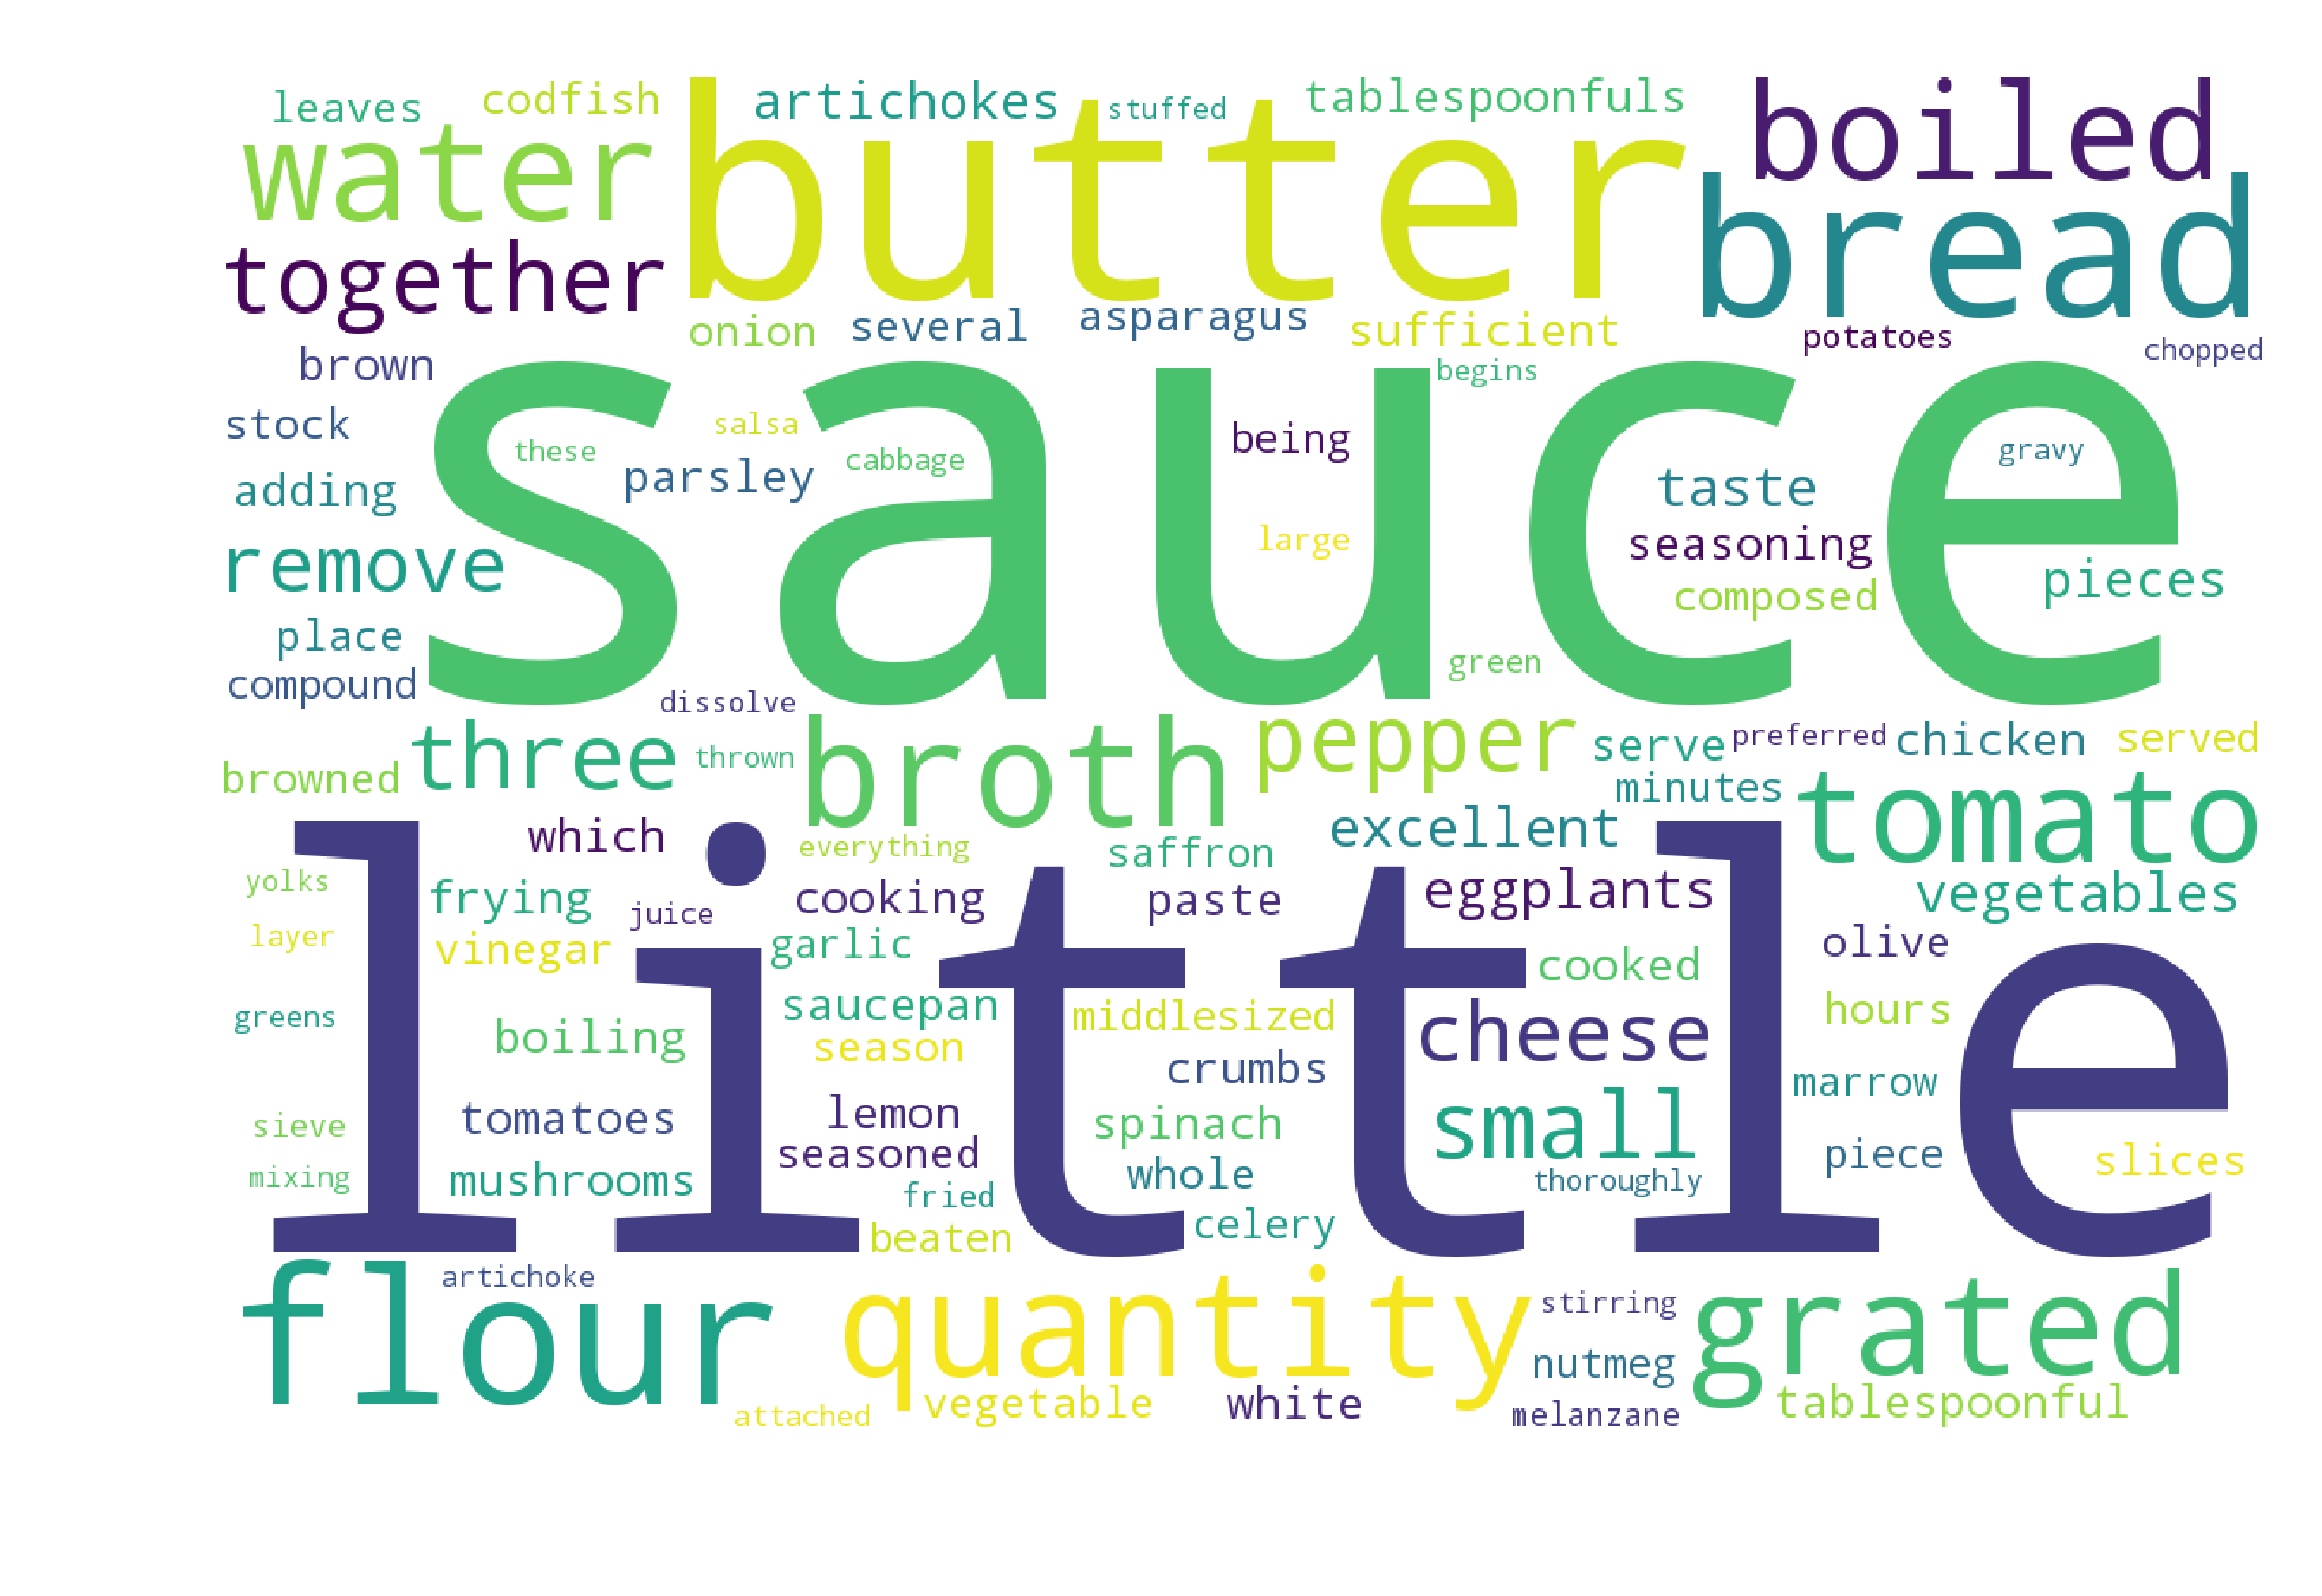

In [10]:
# visualise most relevance words
tmt.visualisation.plot_wordcloud(words_by_relevance[:100])